Consider the analog signal: xa(t)=3cos(200πt)+5sin(600πt)+10cos(1200πt).
Show the effect of sampling rate. 

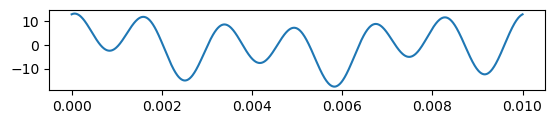

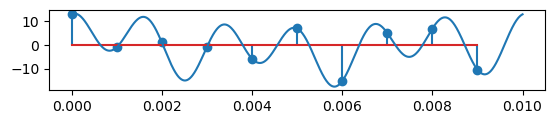

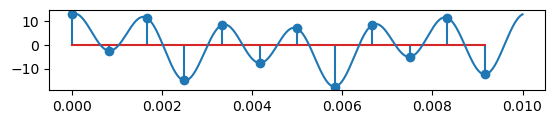

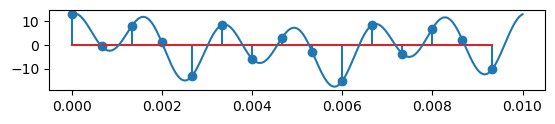

In [4]:
import numpy as np
import matplotlib.pyplot as plt


t_max = 0.01
t = np.linspace(0, t_max, 1000)
x = 3*np.cos(200*np.pi*t)+5*np.sin(600*np.pi*t)+10*np.cos(1200*np.pi*t)
f_max = 600

sampling_freq = [1000, 1200, 1500]
plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.show()
plt_no = 2
for f in sampling_freq:
    n = np.arange(0, t_max, 1/f)
    x_sample = 3*np.cos(200*np.pi*n)+5*np.sin(600*np.pi*n)+10*np.cos(1200*np.pi*n)

    plt.subplot(4, 1, plt_no)
    plt.stem(n, x_sample)
    plt.plot(t, x)
    plt.show()
    plt_no = plt_no+1


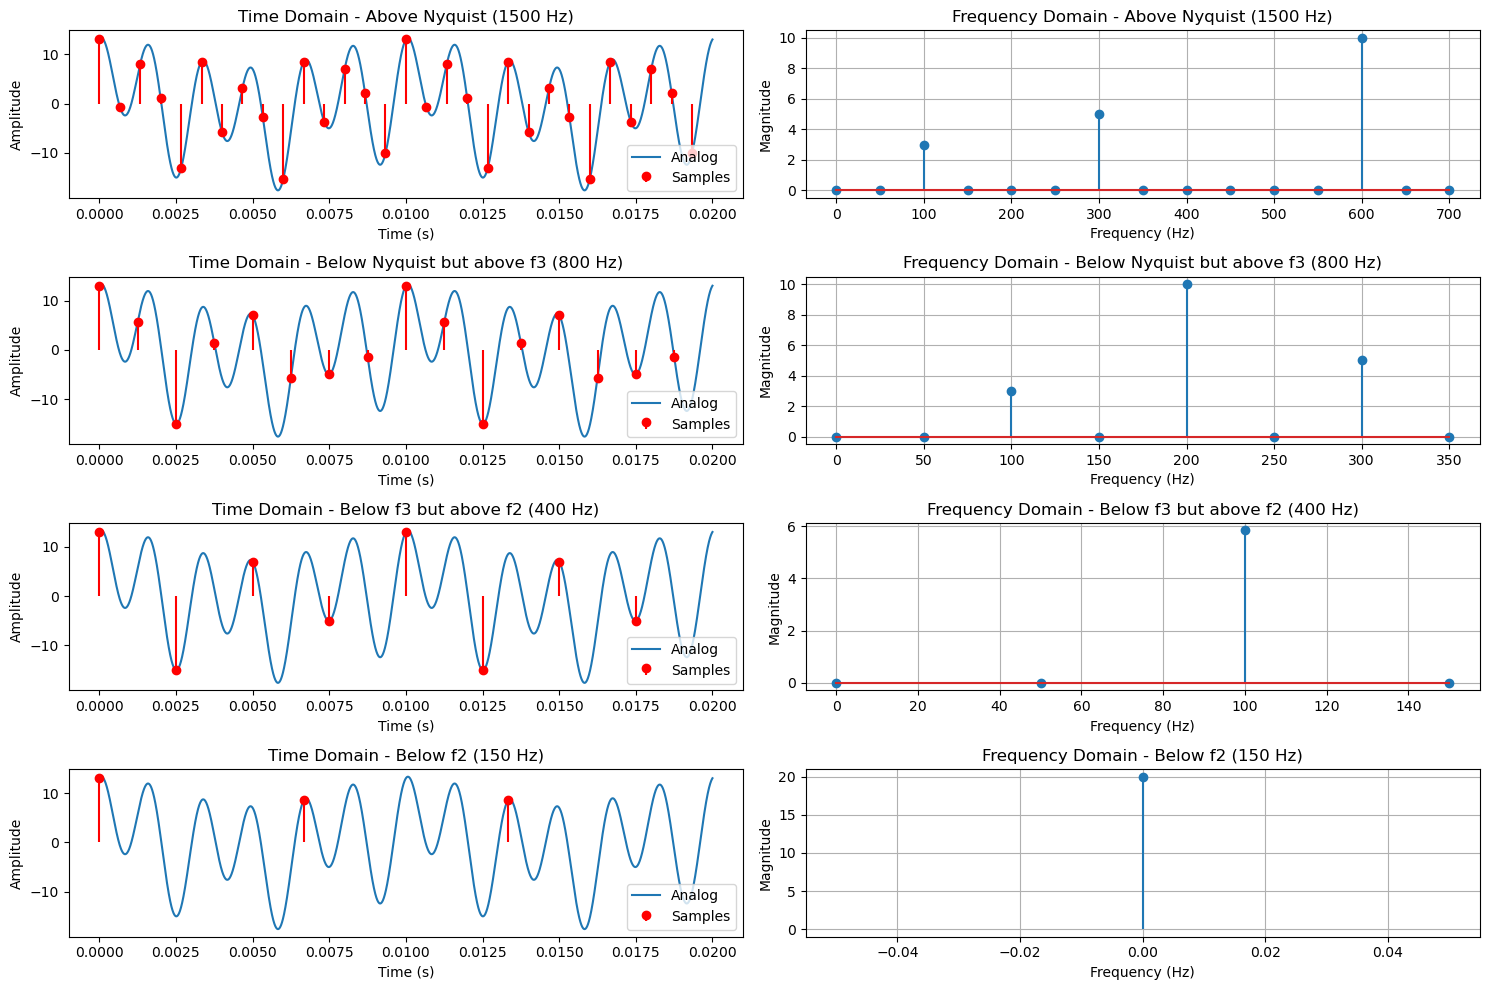

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Analog signal
def analog_signal(t):
    return 3*np.cos(200*np.pi*t) + 5*np.sin(600*np.pi*t) + 10*np.cos(1200*np.pi*t)

t_cont = np.linspace(0, 0.02, 5000)
x_cont = analog_signal(t_cont)

# Sampling rates to test
sampling_rates = [1500, 800, 400, 150]
titles = ["Above Nyquist (1500 Hz)", "Below Nyquist but above f3 (800 Hz)",
          "Below f3 but above f2 (400 Hz)", "Below f2 (150 Hz)"]

plt.figure(figsize=(15, 10))

for i, fs in enumerate(sampling_rates):
    # Time vector and samples
    t_samples = np.arange(0, 0.02, 1/fs)
    x_samples = analog_signal(t_samples)
    
    # FFT for frequency analysis
    N = len(x_samples)
    yf = fft(x_samples)
    xf = fftfreq(N, 1/fs)[:N//2]
    
    # Time domain plot
    plt.subplot(4, 2, 2*i+1)
    plt.plot(t_cont, x_cont, label='Analog')
    plt.stem(t_samples, x_samples, linefmt='r-', markerfmt='ro', basefmt=' ', label='Samples')
    plt.title(f'Time Domain - {titles[i]}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    
    # Frequency domain plot
    plt.subplot(4, 2, 2*i+2)
    plt.stem(xf, 2/N * np.abs(yf[0:N//2]))
    plt.title(f'Frequency Domain - {titles[i]}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()

plt.tight_layout()
plt.show()